<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup
import csv

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE, 'r', encoding='utf-8') as arquivo:
  fonte = BeautifulSoup(arquivo, 'lxml')

In [ ]:
# visualize os resultados

print(fonte)

In [ ]:
# manipule os dados

dados_estados =[]

for estado in fonte.find_all('estado'):
  nome = estado.find('nome').text.strip()
  sigla = estado.find('sigla').text.strip()
  regiao = estado.find('regiao').text.strip()

  dados_estados.append([nome, sigla, regiao])

print(dados_estados)

In [10]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(NOME_ARQUIVO_DESTINO, 'w', newline='', encoding='utf-8') as arquivo:
  escritor = csv.writer(arquivo, delimiter=';')
  escritor.writerow(['estado', 'sigla', 'regiao'])
  escritor.writerows(dados_estados)

print(f'Arquivo {NOME_ARQUIVO_DESTINO} criado com sucesso!')

Arquivo estados-limpo.csv criado com sucesso!


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [2]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

In [3]:
# visualize os resultados

display(fonte.head())

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [ ]:
# manipule os dados

# continue o codigo aqui

In [4]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;
import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'
NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'


fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

fonte = fonte[fonte['Censo'] == 2010][['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita']].copy()
fonte.columns = ['estado', 'cidade', 'pib', 'populacao', 'pib_percapita']

fonte.to_csv(NOME_ARQUIVO_DESTINO, sep=';', index=False)

print(f'Dados extraídos com sucesso em {NOME_ARQUIVO_DESTINO}')

Dados extraídos com sucesso em cidades-limpo.csv


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [9]:
# solução do exercício 1.3

import pandas as pd

estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep=';')

print(estados_df.columns)
print(cidades_df.columns)

# O estado do PIAUI está com um acento na letra I, o que está gerando uma incosistência no final.
estados_df['estado'] = estados_df['estado'].replace({'PIAUÍ': 'PIAUI'})
cidades_df['estado'] = cidades_df['estado'].replace({'PIAUÍ': 'PIAUI'})

brasil_df = pd.merge(cidades_df, estados_df,left_on='estado', right_on='estado', how='left')

print(brasil_df.head())

brasil_df.to_csv('brasil.csv', index=False, sep=';', encoding='utf-8')

Index(['estado', 'sigla', 'regiao'], dtype='object')
Index(['estado', 'cidade', 'pib', 'populacao', 'pib_percapita'], dtype='object')
              estado     cidade           pib  populacao  pib_percapita sigla  \
0              BAHIA   Tremedal  5.788399e+04      18433    3140.239990    BA   
1  RIO GRANDE DO SUL     Turuçu  4.572388e+04       4000   11430.969727    RS   
2     ESPIRITO SANTO    Vitória  1.978263e+07     320156   61790.589844    ES   
3       MINAS GERAIS  Jacutinga  2.478160e+05      21424   11567.209961    MG   
4              PIAUI    Nazária  2.095138e+04       7895    2653.750000    PI   

     regiao  
0  NORDESTE  
1       SUL  
2   SUDESTE  
3   SUDESTE  
4  NORDESTE  


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [12]:
# solução do exercício 2.1
import pandas as pd

brasil_df = pd.read_csv('brasil.csv', sep=';')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [13]:
# código para responder a pergunta
brasil_df.nlargest(10, 'populacao')[['cidade', 'estado', 'populacao']]

,cidade,estado,populacao
4921,São Paulo,SÃO PAULO,11037593
785,Rio de Janeiro,RIO DE JANEIRO,6186710
519,Salvador,BAHIA,2998056
3070,Brasília,DISTRITO FEDERAL,2606885
4523,Fortaleza,CEARÁ,2505552
4871,Belo Horizonte,MINAS GERAIS,2452617
1812,Curitiba,PARANÁ,1851215
333,Manaus,AMAZONAS,1738641
3542,Recife,PERNAMBUCO,1561659
5219,Belém,PARÁ,1437600


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [14]:
# código para responder a pergunta
brasil_df[brasil_df['regiao'] == 'NORDESTE'].nsmallest(5, 'pib_percapita')[['cidade', 'estado', 'pib_percapita']]

,cidade,estado,pib_percapita
103,Dom Inocêncio,PIAUI,2358.239990
4726,Caetanos,BAHIA,2440.570068
4838,Novo Triunfo,BAHIA,2497.060059
3531,Matina,BAHIA,2551.989990
1393,São Lourenço do Piauí,PIAUI,2566.340088


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [22]:
# código para responder a pergunta
brasil_df[brasil_df['estado'] == 'SÃO PAULO'].nlargest(15, 'pib')[['cidade', 'pib']]

,cidade,pib
4921,São Paulo,389317152.0
4450,Guarulhos,32473828.0
5425,Campinas,31654720.0
3426,Osasco,31616452.0
979,São Bernardo do Campo,28935768.0
5456,Barueri,26908070.0
576,Santos,22546134.0
2509,São José dos Campos,22018042.0
2704,Jundiaí,16585137.0
1027,Santo André,14709603.0


 - Qual é o PIB do estado de Santa Catarina?

In [17]:
# código para responder a pergunta
brasil_df[brasil_df['estado'] == 'SANTA CATARINA']['pib'].sum()

np.float64(129806256.75195317)

 - Qual é o população da região sul?

In [18]:
# código para responder a pergunta
brasil_df[brasil_df['regiao'] == 'SUL']['populacao'].sum()

np.int64(17032871)

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [19]:
# código para responder a pergunta
brasil_df[brasil_df['estado'] == 'MATO GROSSO DO SUL']['pib_percapita'].mean()

np.float64(14458.896859975644)

 - Qual é a população do Brasil?

In [20]:
# código para responder a pergunta
brasil_df['populacao'].sum()

np.int64(191176146)

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

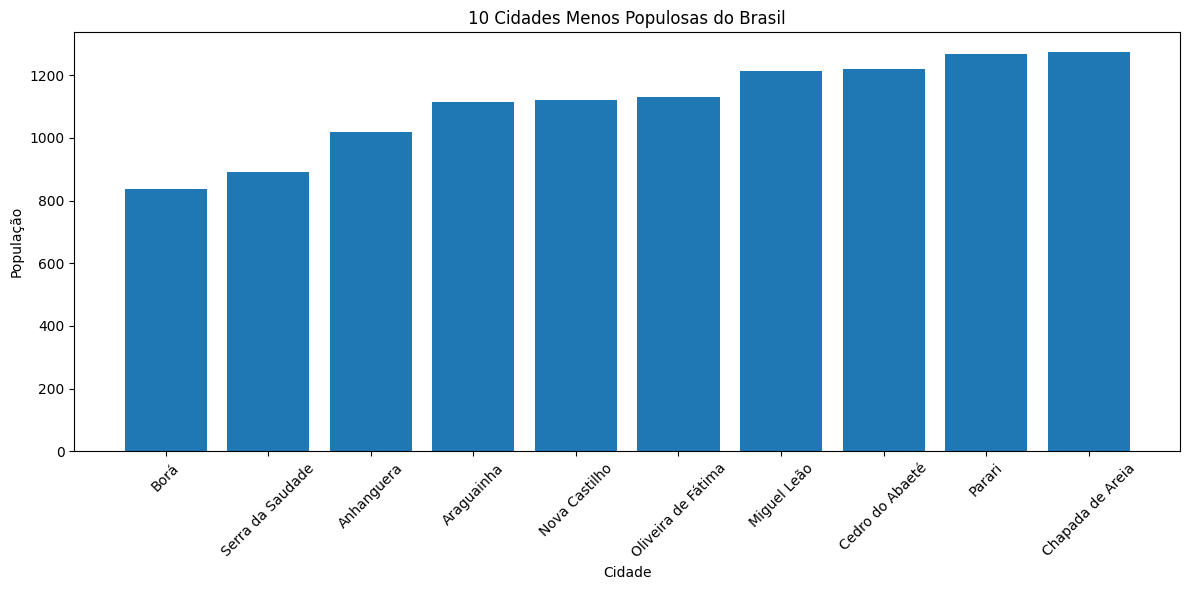

In [26]:
# código para gerar a visualização

import matplotlib.pyplot as plt

cidades_menos_populosas = brasil_df.nsmallest(10, 'populacao')

# Cria uma nova figura, nas dimensões abaixo.
plt.figure(figsize=(12, 6))

# Cria um gráfico de barras verticais, definindo os eixos X e Y, respectivamente.
plt.bar(cidades_menos_populosas['cidade'], cidades_menos_populosas['populacao'])

# Adiciona um título ao gráfico.
plt.title('10 Cidades Menos Populosas do Brasil')

# Rótulo do eixo X.
plt.xlabel('Cidade')

# Rótulo do eixo Y.
plt.ylabel('População')

# Gira o nome das cidades em 45 graus para melhorar a visualização.
plt.xticks(rotation=45)

# Ajusta os espaçamentos e margens automaticamente.
plt.tight_layout()


# Exibe o gráfico na tela.
plt.show()

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

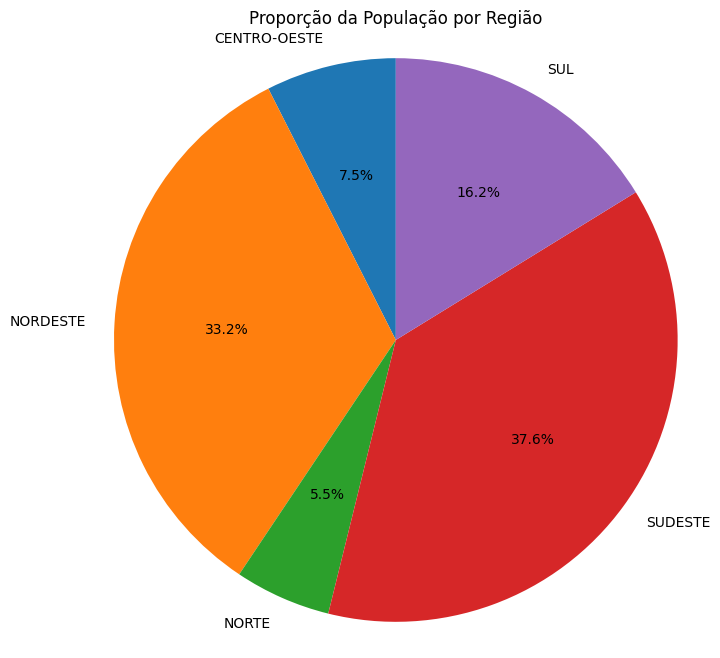

In [27]:
# código para gerar a visualização

populacao_por_regiao = brasil_df.groupby('regiao')['populacao'].sum()

# Cria uma nova figura, nas dimensões abaixo.
plt.figure(figsize=(8, 8))

# Informa quais os valores de referência e que serão percentuais.
plt.pie(populacao_por_regiao, labels=populacao_por_regiao.index, autopct='%1.1f%%', startangle=90)

# Define o título.
plt.title('Proporção da População por Região')

# Deixa o gráfico circular.
plt.axis('equal')

# Exibe o gráfico na tela.
plt.show()
